# TPE SUR LES DIFFERENTES ERREURS
### Liste des Membres du groupe : 

- **KEMBOU FOSSO RICHEL : 22U2118**
- **KELODJOU DJOMO NAFISSATOU IVANA : 22T2894**
- **MEFFO TAHAFO LEA JECY : 22U2194**
- **TSEMEGNE MARTIN YVAN : 22U2080**

In [1]:
import sympy as sp
sp.init_printing()

In [2]:
x, y, z = sp.symbols('x y z')
N, i = sp.symbols('N i', integer=True, positive=True)
y = sp.Function('y')(i)
y_hat = sp.Function('y_hat')(i)
a, b = sp.symbols('a b', real=True)

### Erreur Quadratique Moyenne

In [3]:
EQM = (1 / N )* sp.summation((y - y_hat)**2 ,(i, 1, N))
sp.pprint(EQM.simplify())

  N                    
 ___                   
 ╲                     
  ╲                   2
  ╱   (y(i) - yₕₐₜ(i)) 
 ╱                     
 ‾‾‾                   
i = 1                  
───────────────────────
           N           


#### Représentation du gradient

In [4]:
i = 0

grad_mse = sp.diff(EQM, y_hat)
print("Le gradient de cette erreur sans la somme est  : ", end="")
print(grad_mse.simplify())

Le gradient de cette erreur sans la somme est  : 2*Sum(-y(i) + y_hat(i), (i, 1, N))/N


### Etude de la convexité de l'erreur quadratique moyenne

### ENTROPIE CROISEE CATEGORIELLE

In [5]:
i, N = sp.symbols('i N', integer=True, positive=True)
y = sp.Function('y')(i)
y_hat = sp.Function('y_hat')(i)

ECC = - sp.summation(y * sp.log(y_hat), (i, 1, N))
sp.pretty_print(ECC)

   N                    
  ___                   
  ╲                     
   ╲                    
-  ╱   y(i)⋅log(yₕₐₜ(i))
  ╱                     
  ‾‾‾                   
 i = 1                  


#### Gradient de l'entropie croisée catégorielle

In [6]:
gradient_ecc = sp.diff(ECC, y_hat)
sp.pretty_print(gradient_ecc)

  N           
 ____         
 ╲            
  ╲           
   ╲    y(i)  
-  ╱   ───────
  ╱    yₕₐₜ(i)
 ╱            
 ‾‾‾‾         
 i = 1        


### convexité

In [7]:
grad_2_ecc = sp.diff(ECC, y_hat, 2)
sp.pretty_print(grad_2_ecc)

  N       
 ___      
 ╲        
  ╲       
  ╱   y(i)
 ╱        
 ‾‾‾      
i = 1     
──────────
     2    
 yₕₐₜ (i) 


#### Interprétation
- **Avec cette représentationde la dérivée seconde, on comprend que la fonction est strictement positive pour toute valeur de ŷ c'est à dire toutes les prédictions**
- **Lorsqu'on passe à la Hessienne d'une telle Matrice, toutes les valeurs propres de cette matrice sont supérieures à Zero**
- **C'est la preuve d'une convexité stricte**

## Application

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Lecture des données
df = pd.read_csv("Data/classification_data.csv")

df.head()


,X1,X2,Y_Classe
0,-3.410156,8.576746,0
1,6.012982,2.466296,1
2,-6.438815,10.247140,0
3,7.469158,2.235036,1
4,4.351337,2.425491,1


In [9]:
df.describe()

,X1,X2,Y_Classe
count,80.000000,80.000000,80.000000
mean,0.852113,5.459547,0.500000
std,3.886916,3.698847,0.503155
min,-6.438815,-0.222103,0.000000
25%,-2.633577,2.246349,0.000000
50%,0.810672,5.850483,0.500000
75%,4.602746,8.666216,1.000000
max,7.469158,11.792703,1.000000


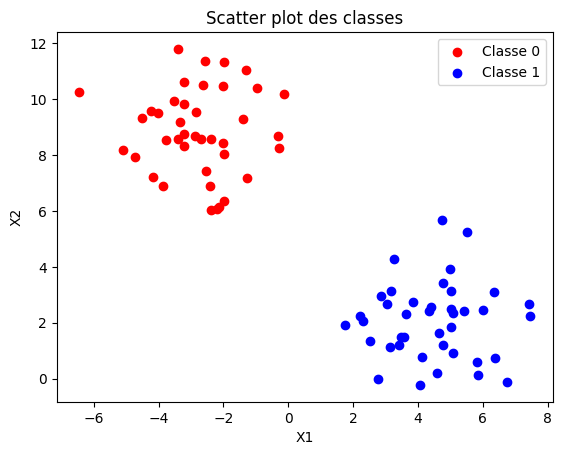

In [10]:
classe0 = df[df["Y_Classe"] == 0]
classe1 = df[df["Y_Classe"] == 1]

plt.scatter(classe0["X1"], classe0["X2"], color="red", label="Classe 0")
plt.scatter(classe1["X1"], classe1["X2"], color="blue", label="Classe 1")

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Scatter plot des classes")
plt.show()



In [11]:
class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, epochs=600):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def categorical_cross_entropy(self, y_true, y_pred):
        # Éviter log(0)
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        print(n_samples, n_features)
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        losses = []
        
        for epoch in range(self.epochs):
            # Forward pass
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            
            # Calcul de la perte
            loss = self.categorical_cross_entropy(y, y_pred)
            losses.append(loss)
            
            # Backward pass (gradients)
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            
            # Mise à jour des paramètres
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            if epoch % 30 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        
        return losses
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return (y_pred > 0.5).astype(int)

# Utilisation
X = df[["X1", "X2"]].values
y = df["Y_Classe"].values
#print(y.shape)
model = LogisticRegressionFromScratch(learning_rate=0.1, epochs=600)
losses = model.fit(X, y)

80 2
Epoch 0, Loss: 0.6931
Epoch 30, Loss: 0.0350
Epoch 60, Loss: 0.0203
Epoch 90, Loss: 0.0147
Epoch 120, Loss: 0.0117
Epoch 150, Loss: 0.0098
Epoch 180, Loss: 0.0084
Epoch 210, Loss: 0.0074
Epoch 240, Loss: 0.0067
Epoch 270, Loss: 0.0061
Epoch 300, Loss: 0.0056
Epoch 330, Loss: 0.0051
Epoch 360, Loss: 0.0048
Epoch 390, Loss: 0.0045
Epoch 420, Loss: 0.0042
Epoch 450, Loss: 0.0040
Epoch 480, Loss: 0.0038
Epoch 510, Loss: 0.0036
Epoch 540, Loss: 0.0034
Epoch 570, Loss: 0.0033


In [12]:
predictions = model.predict(X)
accuracy = np.mean(predictions == y)
print(f"\nAccuracy: {accuracy:.2f}")


Accuracy: 1.00


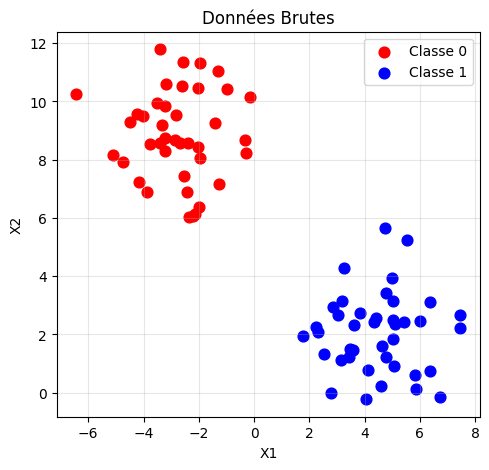

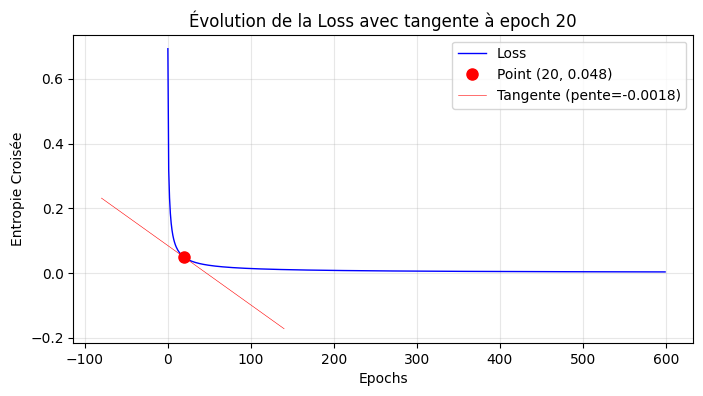

In [13]:
# Figure avec frontière de décision
plt.figure(figsize=(12, 5))

# Subplot 1: Données seules
plt.subplot(1, 2, 1)
plt.scatter(df[df['Y_Classe'] == 0]['X1'], df[df['Y_Classe'] == 0]['X2'], 
            c='red', label='Classe 0', s=60)
plt.scatter(df[df['Y_Classe'] == 1]['X1'], df[df['Y_Classe'] == 1]['X2'], 
            c='blue', label='Classe 1', s=60)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Données Brutes')
plt.grid(True, alpha=0.3)


plt.figure(figsize=(8, 4))
plt.plot(losses, 'b-', linewidth=1, label='Loss')

epoch = 20
loss_value = losses[epoch]
plt.plot(epoch, loss_value, 'ro', markersize=8, label=f'Point ({epoch}, {loss_value:.3f})')

# 3. Calcul de la tangente (pente)
if epoch > 0 and epoch < len(losses)-1:
    # Pente = dérivée numérique (différence avant/arrière moyenne)
    pente = (losses[epoch+1] - losses[epoch-1]) / 2
    
    # 4. Équation CORRECTE de la tangente: y = pente*(x - epoch) + loss_value
    x_tangent = np.array([epoch-100, epoch+120])  # Points autour du point
    y_tangent = pente * (x_tangent - epoch) + loss_value  # ✅ FORMULE CORRECTE
    
    plt.plot(x_tangent, y_tangent, 'r-', linewidth=0.4,  label=f'Tangente (pente={pente:.4f})')
  
plt.xlabel('Epochs')
plt.ylabel('Entropie Croisée')
plt.title('Évolution de la Loss avec tangente à epoch 20')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

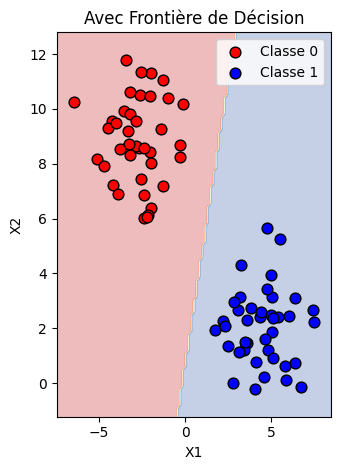

In [14]:
# Subplot 2: Avec frontière
plt.subplot(1, 2, 2)

# Frontière de décision
x_min, x_max = df['X1'].min() - 1, df['X1'].max() + 1
y_min, y_max = df['X2'].min() - 1, df['X2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
plt.scatter(df[df['Y_Classe'] == 0]['X1'], df[df['Y_Classe'] == 0]['X2'], 
            c='red', label='Classe 0', s=60, edgecolors='black')
plt.scatter(df[df['Y_Classe'] == 1]['X1'], df[df['Y_Classe'] == 1]['X2'], 
            c='blue', label='Classe 1', s=60, edgecolors='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Avec Frontière de Décision')

plt.tight_layout()
plt.show()
